# Sentiment analysis using VADER

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy

## First training step

In [2]:
data = pd.read_csv("data_processed/dataset_nlp.csv", encoding='utf-8')
data.head()

,type,date,texte,source_url,text_processed,date_normalized
0,publication,dimanche 6 avril 2025 à 16h51min,"(Hèrèdougou,le 06 Avril 2025), Sous un soleil ...",https://lefaso.net/spip.php?article137232,hèrèdougou le 06 avril 2025 sous un soleil ard...,2025-04-06 16:51:00
1,comment,6 avril 19:07,Félicitations Mr le ministre pour votre présen...,https://lefaso.net/spip.php?article137232,félicitations mr le ministre pour votre présen...,2024-04-06 19:07:00
2,reply,7 avril 16:53,Bravo à l’engagement du ministre Adama Luc SOR...,https://lefaso.net/spip.php?article137232,bravo à l’ engagement du ministre adama luc so...,2024-04-07 16:53:00
3,publication,jeudi 3 avril 2025 à 21h50min,"Comme prévu, le procès du groupe Breba Finance...",https://lefaso.net/spip.php?article137192,comme prévu le procès du groupe breba finance ...,2025-04-03 21:50:00
4,comment,4 avril 08:34,Je compatis au désarrois des victimes de ces v...,https://lefaso.net/spip.php?article137192,je compatis au désarrois des victimes de ces v...,2024-04-04 08:34:00


In [3]:
data = data[["type", "date_normalized", "text_processed"]]
data.head()

,type,date_normalized,text_processed
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...
2,reply,2024-04-07 16:53:00,bravo à l’ engagement du ministre adama luc so...
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6946 entries, 0 to 6945
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             6946 non-null   object
 1   date_normalized  6946 non-null   object
 2   text_processed   6946 non-null   object
dtypes: object(3)
memory usage: 162.9+ KB


In [5]:
data.value_counts("type")

type
comment        4341
publication    1400
reply          1205
Name: count, dtype: int64

In [6]:
data

,type,date_normalized,text_processed
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...
2,reply,2024-04-07 16:53:00,bravo à l’ engagement du ministre adama luc so...
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...
...,...,...,...
6941,comment,2024-07-16 20:14:00,mr tranntoll rassurez -vous car je n’ ai aucun...
6942,comment,2024-07-17 02:21:00,ultra faux ce que vous écrivez arrêtez vos thé...
6943,comment,2024-07-17 12:52:00,messire amkoulel d’ abord bonsoir chez vous ai...
6944,comment,2024-07-18 00:35:00,hélie incroyable de constater votre changement...


In [7]:
# Removing special characters
data["text_processed"] = data["text_processed"].apply(lambda df: re.sub(r"([^\w\s])", " ", df))
data

,type,date_normalized,text_processed
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...
2,reply,2024-04-07 16:53:00,bravo à l engagement du ministre adama luc so...
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...
...,...,...,...
6941,comment,2024-07-16 20:14:00,mr tranntoll rassurez vous car je n ai aucun...
6942,comment,2024-07-17 02:21:00,ultra faux ce que vous écrivez arrêtez vos thé...
6943,comment,2024-07-17 12:52:00,messire amkoulel d abord bonsoir chez vous ai...
6944,comment,2024-07-18 00:35:00,hélie incroyable de constater votre changement...


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Removing stopswords
stop_words = set(stopwords.words('french'))
#others_stop_words = ["cette", "ça", "faut", "va", "a", "tous", "toutes", "là"]
#stop_words.update(others_stop_words)
print(f"les stopwords: {stop_words}")
data["text_processed_w_stpw"] = data["text_processed"].apply(lambda line: ' '.join([word for word in line.split() if word not in stop_words]))

les stopwords: {'aies', 'le', 'eues', 'ils', 'avez', 'ses', 'même', 'es', 'notre', 'sur', 'seras', 'aient', 'eue', 'soit', 'eût', 'tu', 'toi', 'fûmes', 's', 'une', 'les', 'ce', 'soyez', 'eûtes', 'on', 'se', 'ayant', 'ayante', 'étions', 'eu', 'fussent', 'auriez', 'étaient', 'été', 'eûmes', 'à', 'as', 'qu', 'l', 'avions', 'aux', 'elle', 'fus', 'ait', 'pour', 'y', 'm', 'serez', 'me', 'était', 'étés', 'eusse', 'leur', 'c', 'mon', 'ont', 't', 'étant', 'serait', 'étiez', 'vous', 'te', 'eussent', 'eus', 'avais', 'serions', 'vos', 'suis', 'pas', 'eux', 'qui', 'soyons', 'étée', 'un', 'par', 'au', 'étante', 'fussions', 'du', 'seront', 'étants', 'serais', 'aurai', 'fût', 'moi', 'auras', 'eussiez', 'aurez', 'est', 'aura', 'avec', 'sois', 'sont', 'ai', 'que', 'ces', 'êtes', 'fusse', 'aie', 'sa', 'étantes', 'auront', 'fut', 'j', 'n', 'aviez', 'sommes', 'mais', 'et', 'd', 'serons', 'aurions', 'ayez', 'ayants', 'de', 'serai', 'fusses', 'étais', 'il', 'nous', 'sera', 'je', 'aurait', 'en', 'eut', 'ou', 

In [10]:
data.head()

,type,date_normalized,text_processed,text_processed_w_stpw
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...,hèrèdougou 06 avril 2025 sous soleil ardent al...
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...,félicitations mr ministre présence renouveillé...
2,reply,2024-04-07 16:53:00,bravo à l engagement du ministre adama luc so...,bravo engagement ministre adama luc sorgho équ...
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...,comme prévu procès groupe breba finance tenu j...
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...,compatis désarrois victimes vendeurs illusions...


In [11]:
nlp = spacy.load("fr_core_news_sm")

In [12]:
data["comment_process_spacy"] = data["text_processed_w_stpw"].apply(lambda col: nlp(col))
data.head()

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...,hèrèdougou 06 avril 2025 sous soleil ardent al...,"(hèrèdougou, 06, avril, 2025, sous, soleil, ar..."
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...,félicitations mr ministre présence renouveillé...,"(félicitations, mr, ministre, présence, renouv..."
2,reply,2024-04-07 16:53:00,bravo à l engagement du ministre adama luc so...,bravo engagement ministre adama luc sorgho équ...,"(bravo, engagement, ministre, adama, luc, sorg..."
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...,comme prévu procès groupe breba finance tenu j...,"(comme, prévu, procès, groupe, breba, finance,..."
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...,compatis désarrois victimes vendeurs illusions...,"(compatis, désarrois, victimes, vendeurs, illu..."


In [13]:

data["lemetized_tokens"] = data["comment_process_spacy"].apply(lambda tokens: [token.lemma_ for token in tokens])
data.head()

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy,lemetized_tokens
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...,hèrèdougou 06 avril 2025 sous soleil ardent al...,"(hèrèdougou, 06, avril, 2025, sous, soleil, ar...","[hèrèdougou, 06, avril, 2025, sou, soleil, ard..."
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...,félicitations mr ministre présence renouveillé...,"(félicitations, mr, ministre, présence, renouv...","[félicitation, mr, ministre, présence, renouve..."
2,reply,2024-04-07 16:53:00,bravo à l engagement du ministre adama luc so...,bravo engagement ministre adama luc sorgho équ...,"(bravo, engagement, ministre, adama, luc, sorg...","[bravo, engagement, ministre, adama, luc, sorg..."
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...,comme prévu procès groupe breba finance tenu j...,"(comme, prévu, procès, groupe, breba, finance,...","[comme, prévoir, procès, groupe, breba, financ..."
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...,compatis désarrois victimes vendeurs illusions...,"(compatis, désarrois, victimes, vendeurs, illu...","[compati, désarroi, victime, vendeur, illusion..."


In [14]:
data["cleanned_text"] = data["lemetized_tokens"].astype(str)
data

,type,date_normalized,text_processed,text_processed_w_stpw,comment_process_spacy,lemetized_tokens,cleanned_text
0,publication,2025-04-06 16:51:00,hèrèdougou le 06 avril 2025 sous un soleil ard...,hèrèdougou 06 avril 2025 sous soleil ardent al...,"(hèrèdougou, 06, avril, 2025, sous, soleil, ar...","[hèrèdougou, 06, avril, 2025, sou, soleil, ard...","['hèrèdougou', '06', 'avril', '2025', 'sou', '..."
1,comment,2024-04-06 19:07:00,félicitations mr le ministre pour votre présen...,félicitations mr ministre présence renouveillé...,"(félicitations, mr, ministre, présence, renouv...","[félicitation, mr, ministre, présence, renouve...","['félicitation', 'mr', 'ministre', 'présence',..."
2,reply,2024-04-07 16:53:00,bravo à l engagement du ministre adama luc so...,bravo engagement ministre adama luc sorgho équ...,"(bravo, engagement, ministre, adama, luc, sorg...","[bravo, engagement, ministre, adama, luc, sorg...","['bravo', 'engagement', 'ministre', 'adama', '..."
3,publication,2025-04-03 21:50:00,comme prévu le procès du groupe breba finance ...,comme prévu procès groupe breba finance tenu j...,"(comme, prévu, procès, groupe, breba, finance,...","[comme, prévoir, procès, groupe, breba, financ...","['comme', 'prévoir', 'procès', 'groupe', 'breb..."
4,comment,2024-04-04 08:34:00,je compatis au désarrois des victimes de ces v...,compatis désarrois victimes vendeurs illusions...,"(compatis, désarrois, victimes, vendeurs, illu...","[compati, désarroi, victime, vendeur, illusion...","['compati', 'désarroi', 'victime', 'vendeur', ..."
...,...,...,...,...,...,...,...
6941,comment,2024-07-16 20:14:00,mr tranntoll rassurez vous car je n ai aucun...,mr tranntoll rassurez car aucunement besoin le...,"(mr, tranntoll, rassurez, car, aucunement, bes...","[mr, tranntoll, rassurer, car, aucunement, bes...","['mr', 'tranntoll', 'rassurer', 'car', 'aucune..."
6942,comment,2024-07-17 02:21:00,ultra faux ce que vous écrivez arrêtez vos thé...,ultra faux écrivez arrêtez théories ridicules ...,"(ultra, faux, écrivez, arrêtez, théories, ridi...","[ultrer, faux, écrire, arrêter, théorie, ridic...","['ultrer', 'faux', 'écrire', 'arrêter', 'théor..."
6943,comment,2024-07-17 12:52:00,messire amkoulel d abord bonsoir chez vous ai...,messire amkoulel abord bonsoir chez ainsi tout...,"(messire, amkoulel, abord, bonsoir, chez, ains...","[messir, amkoulel, abord, bonsoir, chez, ainsi...","['messir', 'amkoulel', 'abord', 'bonsoir', 'ch..."
6944,comment,2024-07-18 00:35:00,hélie incroyable de constater votre changement...,hélie incroyable constater changement brusque ...,"(hélie, incroyable, constater, changement, bru...","[hélie, incroyable, constater, changement, bru...","['hélie', 'incroyable', 'constater', 'changeme..."


## 2. Words Trends

In [15]:
# Using TF-IDF for mesuring the importance of words
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=100)

tfid_matrix = vectorizer.fit_transform(data["cleanned_text"])

In [19]:
mots_importants = vectorizer.get_feature_names_out()
mots_importants

array(['2024', '2025', 'ae', 'africain', 'afriqu', 'ainsi', 'aller', 'an',
       'année', 'apparaître', 'après', 'aussi', 'autre', 'avoir',
       'beaucoup', 'bien', 'bon', 'burkina', 'burkinabè', 'car', 'ce',
       'cela', 'celer', 'celui', 'certain', 'chef', 'comme', 'contre',
       'contribution', 'créer', 'depuis', 'deux', 'devoir', 'dire',
       'donc', 'donner', 'dont', 'encore', 'entrer', 'etat', 'faire',
       'falloir', 'faso', 'forum', 'france', 'gouvernement', 'grand',
       'général', 'international', 'jeune', 'jour', 'laisser', 'leur',
       'ligne', 'mettre', 'ministre', 'modérer', 'monde', 'national',
       'non', 'nouveau', 'où', 'paragraphe', 'parce', 'passer', 'pay',
       'pays', 'permettre', 'peuple', 'plus', 'politique', 'population',
       'pouvoir', 'premier', 'prendre', 'priori', 'projet', 'président',
       'public', 'quand', 'responsable', 'sans', 'savoir', 'selon', 'si',
       'simplement', 'sou', 'temps', 'toujours', 'tout', 'très',
       'vali

In [20]:
import numpy as np
scores = np.sum(tfid_matrix.toarray(), axis=0)  # Somme des valeurs TF-IDF de chaque mot
mots_scores = sorted(zip(mots_importants, scores), key=lambda x: x[1], reverse=True)

# Affichage des 30 mots les plus importants
for mot, score in mots_scores[:30]:
    print(f"{mot}: {score:.3f}")

avoir: 1240.643
tout: 657.711
faire: 561.131
pouvoir: 544.720
ce: 502.657
plus: 430.637
dire: 392.281
aller: 377.102
si: 357.011
burkina: 355.102
comme: 352.089
bien: 344.399
pays: 318.250
autre: 317.077
être: 310.200
falloir: 309.525
devoir: 306.770
bon: 306.726
faso: 299.740
celui: 271.208
président: 258.608
pay: 258.462
peuple: 244.551
voir: 241.913
vouloir: 234.582
savoir: 229.473
sans: 228.318
état: 221.216
très: 220.368
burkinabè: 220.055


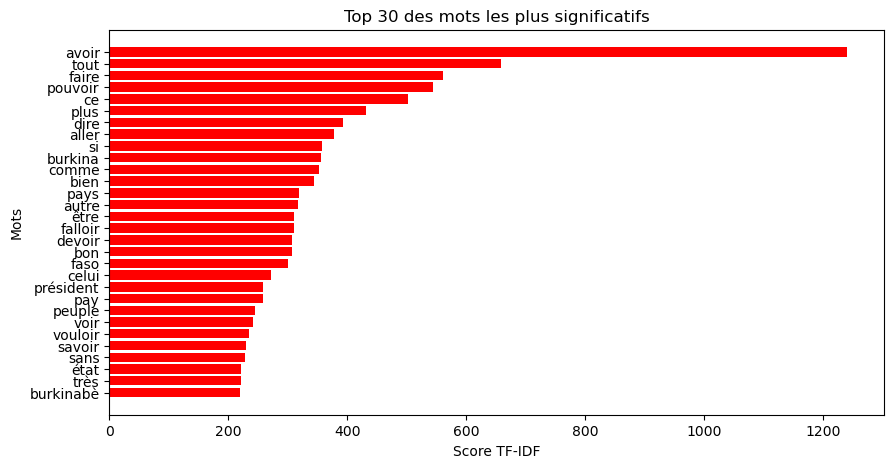

In [25]:
import matplotlib.pyplot as plt

# Extraire les 30 mots les plus importants
mots_top, scores_top = zip(*mots_scores[:30])

plt.figure(figsize=(10, 5))
plt.barh(mots_top, scores_top, color='red')
plt.xlabel("Score TF-IDF")
plt.ylabel("Mots")
plt.title("Top 30 des mots les plus significatifs")
plt.gca().invert_yaxis()
plt.show()